In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random
random.seed(10)

In [2]:
#Reading the train data
images = np.array(imread_collection(r'Train\*.jpg'))
Train = np.zeros((2400, 784))
for i in range(len(images)):
    Train[i]=images[i].flatten()
Train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
#Reading the train labels
Train_Labels = np.loadtxt(r'Train\Training Labels.txt', dtype=str)
Train_Labels = Train_Labels.astype(int) #convert the labels from txt to int
Train_Labels

array([0, 0, 0, ..., 9, 9, 9])

In [4]:
#Reading the test data
images = np.array(imread_collection(r'Test\*.jpg'))
Test = np.zeros((200, 784))
for i in range(len(images)):
    Test[i]=images[i].flatten()
Test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 5., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
#Reading the test labels
Test_Labels = np.loadtxt(r'Test\Test Labels.txt', dtype=str)
Test_Labels = Test_Labels.astype(int)
Test_Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [6]:
#Training Phase
def Sampling(NumOfSamples):
    Indices = random.choices(list(range(len(Train))), weights=None, cum_weights=None, k=NumOfSamples)
    Samples=[]
    Labels=[]
    for i in range (len(Indices)):
        Samples.append(Train[Indices[i]])
        Labels.append(Train_Labels[Indices[i]])
    return Samples, Labels

def Training(NumOfTrees, NumOfSamples, MaxDepth):
    trees=[]
    for i in range(NumOfTrees):
        tree = DecisionTreeClassifier(max_depth = MaxDepth, random_state = 10)
        Samples, Samples_Labels = Sampling(NumOfSamples)
        tree.fit(Samples, Samples_Labels)
        trees.append(tree)
    return trees

Sampling(50)
Forest_1 = Training(10, 50, 10)
Forest_2 = Training(100, 50, 10)
# Sampling(500)
Forest_3 = Training(100, 500, 10)
# Sampling(1000)
Forest_4 = Training(100, 1000, 100)

In [7]:
#Testing Phase
def Testing(trees):
    #Predicting
    y=[]
    for i in range(len(trees)):
        y.append(trees[i].predict(Test))
    
    #Majority Voting
    result = np.zeros(len(y[0]))
    for i in range(len(y[0])):
        current = np.zeros(10)
        for j in range(len(y)):
            current[y[j][i]] +=1
        vote = list(np.where(current == np.max(current))[0])
        result[i] =random.choice(vote)
    return result.astype(int)

Results_1 = Testing(Forest_1)
Results_2 = Testing(Forest_2)
Results_3 = Testing(Forest_3)
Results_4 = Testing(Forest_4)

In [8]:
#Accuracies
print('Classification Accuracy 1:  ' + str(accuracy_score(Test_Labels,Results_1)*100) + ' %')
print('Classification Accuracy 2:  ' + str(accuracy_score(Test_Labels,Results_2)*100) + ' %')
print('Classification Accuracy 3:  ' + str(accuracy_score(Test_Labels,Results_3)*100) + ' %')
print('Classification Accuracy 4:  ' + str(accuracy_score(Test_Labels,Results_4)*100) + ' %')

Classification Accuracy 1:  57.99999999999999 %
Classification Accuracy 2:  76.0 %
Classification Accuracy 3:  84.5 %
Classification Accuracy 4:  88.0 %


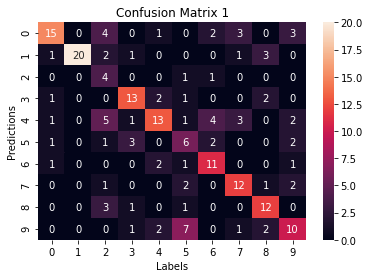

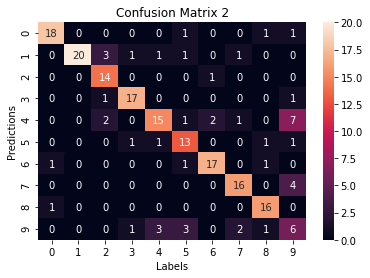

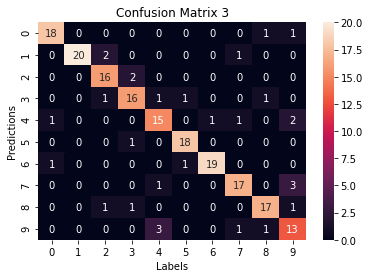

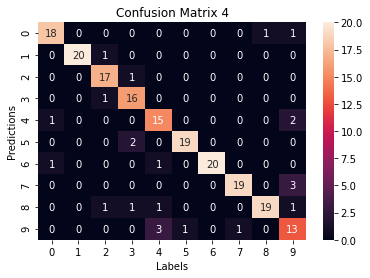

In [9]:
#Confusion Matrices
def CM(Predictions):
    cm = np.zeros((10,10)).astype(int)
    for i in range(len(Predictions)):
        if(Predictions[i]==Test_Labels[i]):
            cm[Test_Labels[i]][Test_Labels[i]]+=1
        else:
            cm[Predictions[i]][Test_Labels[i]]+=1         
    return cm

CM1 = CM(Results_1)
CM2 = CM(Results_2)
CM3 = CM(Results_3)
CM4 = CM(Results_4)
Matrices=[CM1, CM2, CM3, CM4]

for i in range(len(Matrices)):
    heatMap = pd.DataFrame(Matrices[i], index = list(range(10)), columns = list(range(10)))
    sns.heatmap(heatMap, annot=True)
    plt.title('Confusion Matrix '+str(i+1))
    plt.xlabel('Labels')
    plt.ylabel('Predictions')
    #plt.savefig('Confusion-'+str(i)+'.jpg')
    plt.show()